In [1]:
# import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from implementations import *
from networks import *
import seaborn as sns


In [2]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("./data/dataset_to_release", sub_sample=False)

(-2.3, 2.3)

<Figure size 640x480 with 0 Axes>

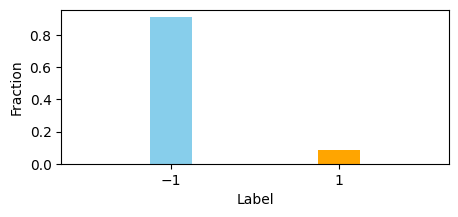

In [5]:
# plot the distribution of the labels -1, 1
plt.figure()
plt.figure(figsize=(5, 2))
plt.bar([-1, 1], [np.sum(y_train == -1)/len(y_train), np.sum(y_train == 1)/len(y_train)],width=0.5,color=['skyblue', 'orange'])
plt.xticks([-1, 1])
plt.ylabel("Fraction")
plt.xlabel("Label")
plt.xlim(-2.3, 2.3)


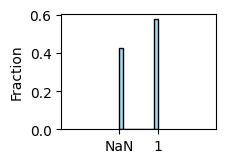

In [6]:
# plot the data distribution of #9 feature of x_train, which is a categorical feature with large proportion of NaNs
column_data = x_train[:, 9]
nan_count = np.isnan(column_data).sum()
column_data_with_nan_marker = np.where(np.isnan(column_data), -1, column_data)
bins = [-1.5, -0.5, 0.5, 1.5]
plt.figure(figsize=(2, 1.5))
sns.histplot(column_data_with_nan_marker, bins=bins, kde=False, color='skyblue', binwidth=0.2,stat="probability")

plt.xticks([-1, 1], ['NaN', '1'], fontsize=10)
plt.xlim(-4, 4)
# plt.xlabel('Values of feature "CTELENUM"')
plt.ylabel('Fraction', fontsize=10)
  # A vertical line to indicate NaNs
plt.savefig('ctelenum.pdf', dpi=600, bbox_inches='tight')
# plt.show()


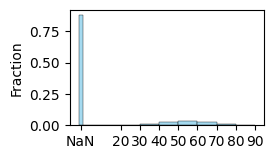

In [3]:
# plot the data distribution of #49 feature of x_train, which is a continuous feature
column_data = x_train[:, 49]
nan_count = np.isnan(column_data).sum()
column_data_with_nan_marker = np.where(np.isnan(column_data), -1, column_data)
unique_values = np.unique(column_data_with_nan_marker)
bin_edges = np.concatenate([[-2, 0], np.arange(20, unique_values.max(),10)])
plt.figure(figsize=(2.5, 1.5))
sns.histplot(column_data_with_nan_marker, bins=bin_edges, kde=False, color='skyblue', stat="probability")
xticks = np.concatenate([[-1], np.arange(20, unique_values.max(),10)])
xtick_labels = ['NaN'] + [str(i) for i in np.arange(20, unique_values.max(), 10).astype(int)]
plt.xticks(xticks, xtick_labels, fontsize=10)
plt.ylabel('Fraction',fontsize=10)
plt.savefig('diabage2.pdf', dpi=600, bbox_inches='tight')